# REDD Dataset Exploration

In [21]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib as plt

## Import dataset

In [22]:
DATASET = Path("Datasets/REDD/low_freq/")
TARGET_HOUSE = "house_1"

In [23]:
house_dir = DATASET / TARGET_HOUSE
labels_file = house_dir / "labels.dat"
channel_files = list(house_dir.glob('channel_*.dat'))

In [24]:
labels = pd.read_table(labels_file, sep = ' ', header = None, index_col = 0)
labels

,1
0,
1,mains
2,mains
3,oven
4,oven
5,refrigerator
6,dishwaser
7,kitchen_outlets
8,kitchen_outlets
9,lighting


In [25]:
channels = None
for channel_file in channel_files:
    channel_n = channel_file.stem.split('_')[1]
    channel = pd.read_table(channel_file, sep = ' ', names = ['' + labels[1][int(channel_n)] + '@' + channel_n], index_col = 0)
    if channels is None:
        channels = channel
    else:
        channels = pd.concat([channels, channel], axis=1)

channels


,washer_dryer@20,lighting@18,washer_dryer@19,lighting@9,kitchen_outlets@8,mains@1,oven@3,mains@2,dishwaser@6,kitchen_outlets@7,refrigerator@5,oven@4,lighting@17,kitchen_outlets@16,stove@14,kitchen_outlets@15,microwave@11,washer_dryer@10,bathroom_gfi@12,electric_heat@13
1303132929,NaN,NaN,NaN,NaN,NaN,224.19,NaN,118.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1303132930,NaN,NaN,NaN,NaN,NaN,225.57,NaN,118.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1303132931,NaN,NaN,NaN,NaN,NaN,226.09,NaN,119.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1303132932,NaN,NaN,NaN,NaN,NaN,222.74,NaN,118.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1303132933,0.0,46.0,0.0,81.0,21.0,222.20,0.0,118.83,0.0,34.0,6.0,0.0,65.0,0.0,0.0,2.0,5.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306267018,NaN,NaN,NaN,NaN,NaN,234.44,NaN,38.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306267019,NaN,NaN,NaN,NaN,NaN,235.57,NaN,38.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306267020,NaN,NaN,NaN,NaN,NaN,234.77,NaN,38.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1306267021,NaN,NaN,NaN,NaN,NaN,235.55,NaN,38.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
TARGET_CHANNEL_NAMES = ['mains', 'lighting', 'washer_dryer', 'refrigerator']
selected_channels = labels[labels[1].isin(TARGET_CHANNEL_NAMES)]
target_channels = (selected_channels[1] + '@' + selected_channels.index.astype(str)).tolist()
target_channels


['mains@1',
 'mains@2',
 'refrigerator@5',
 'lighting@9',
 'washer_dryer@10',
 'lighting@17',
 'lighting@18',
 'washer_dryer@19',
 'washer_dryer@20']

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

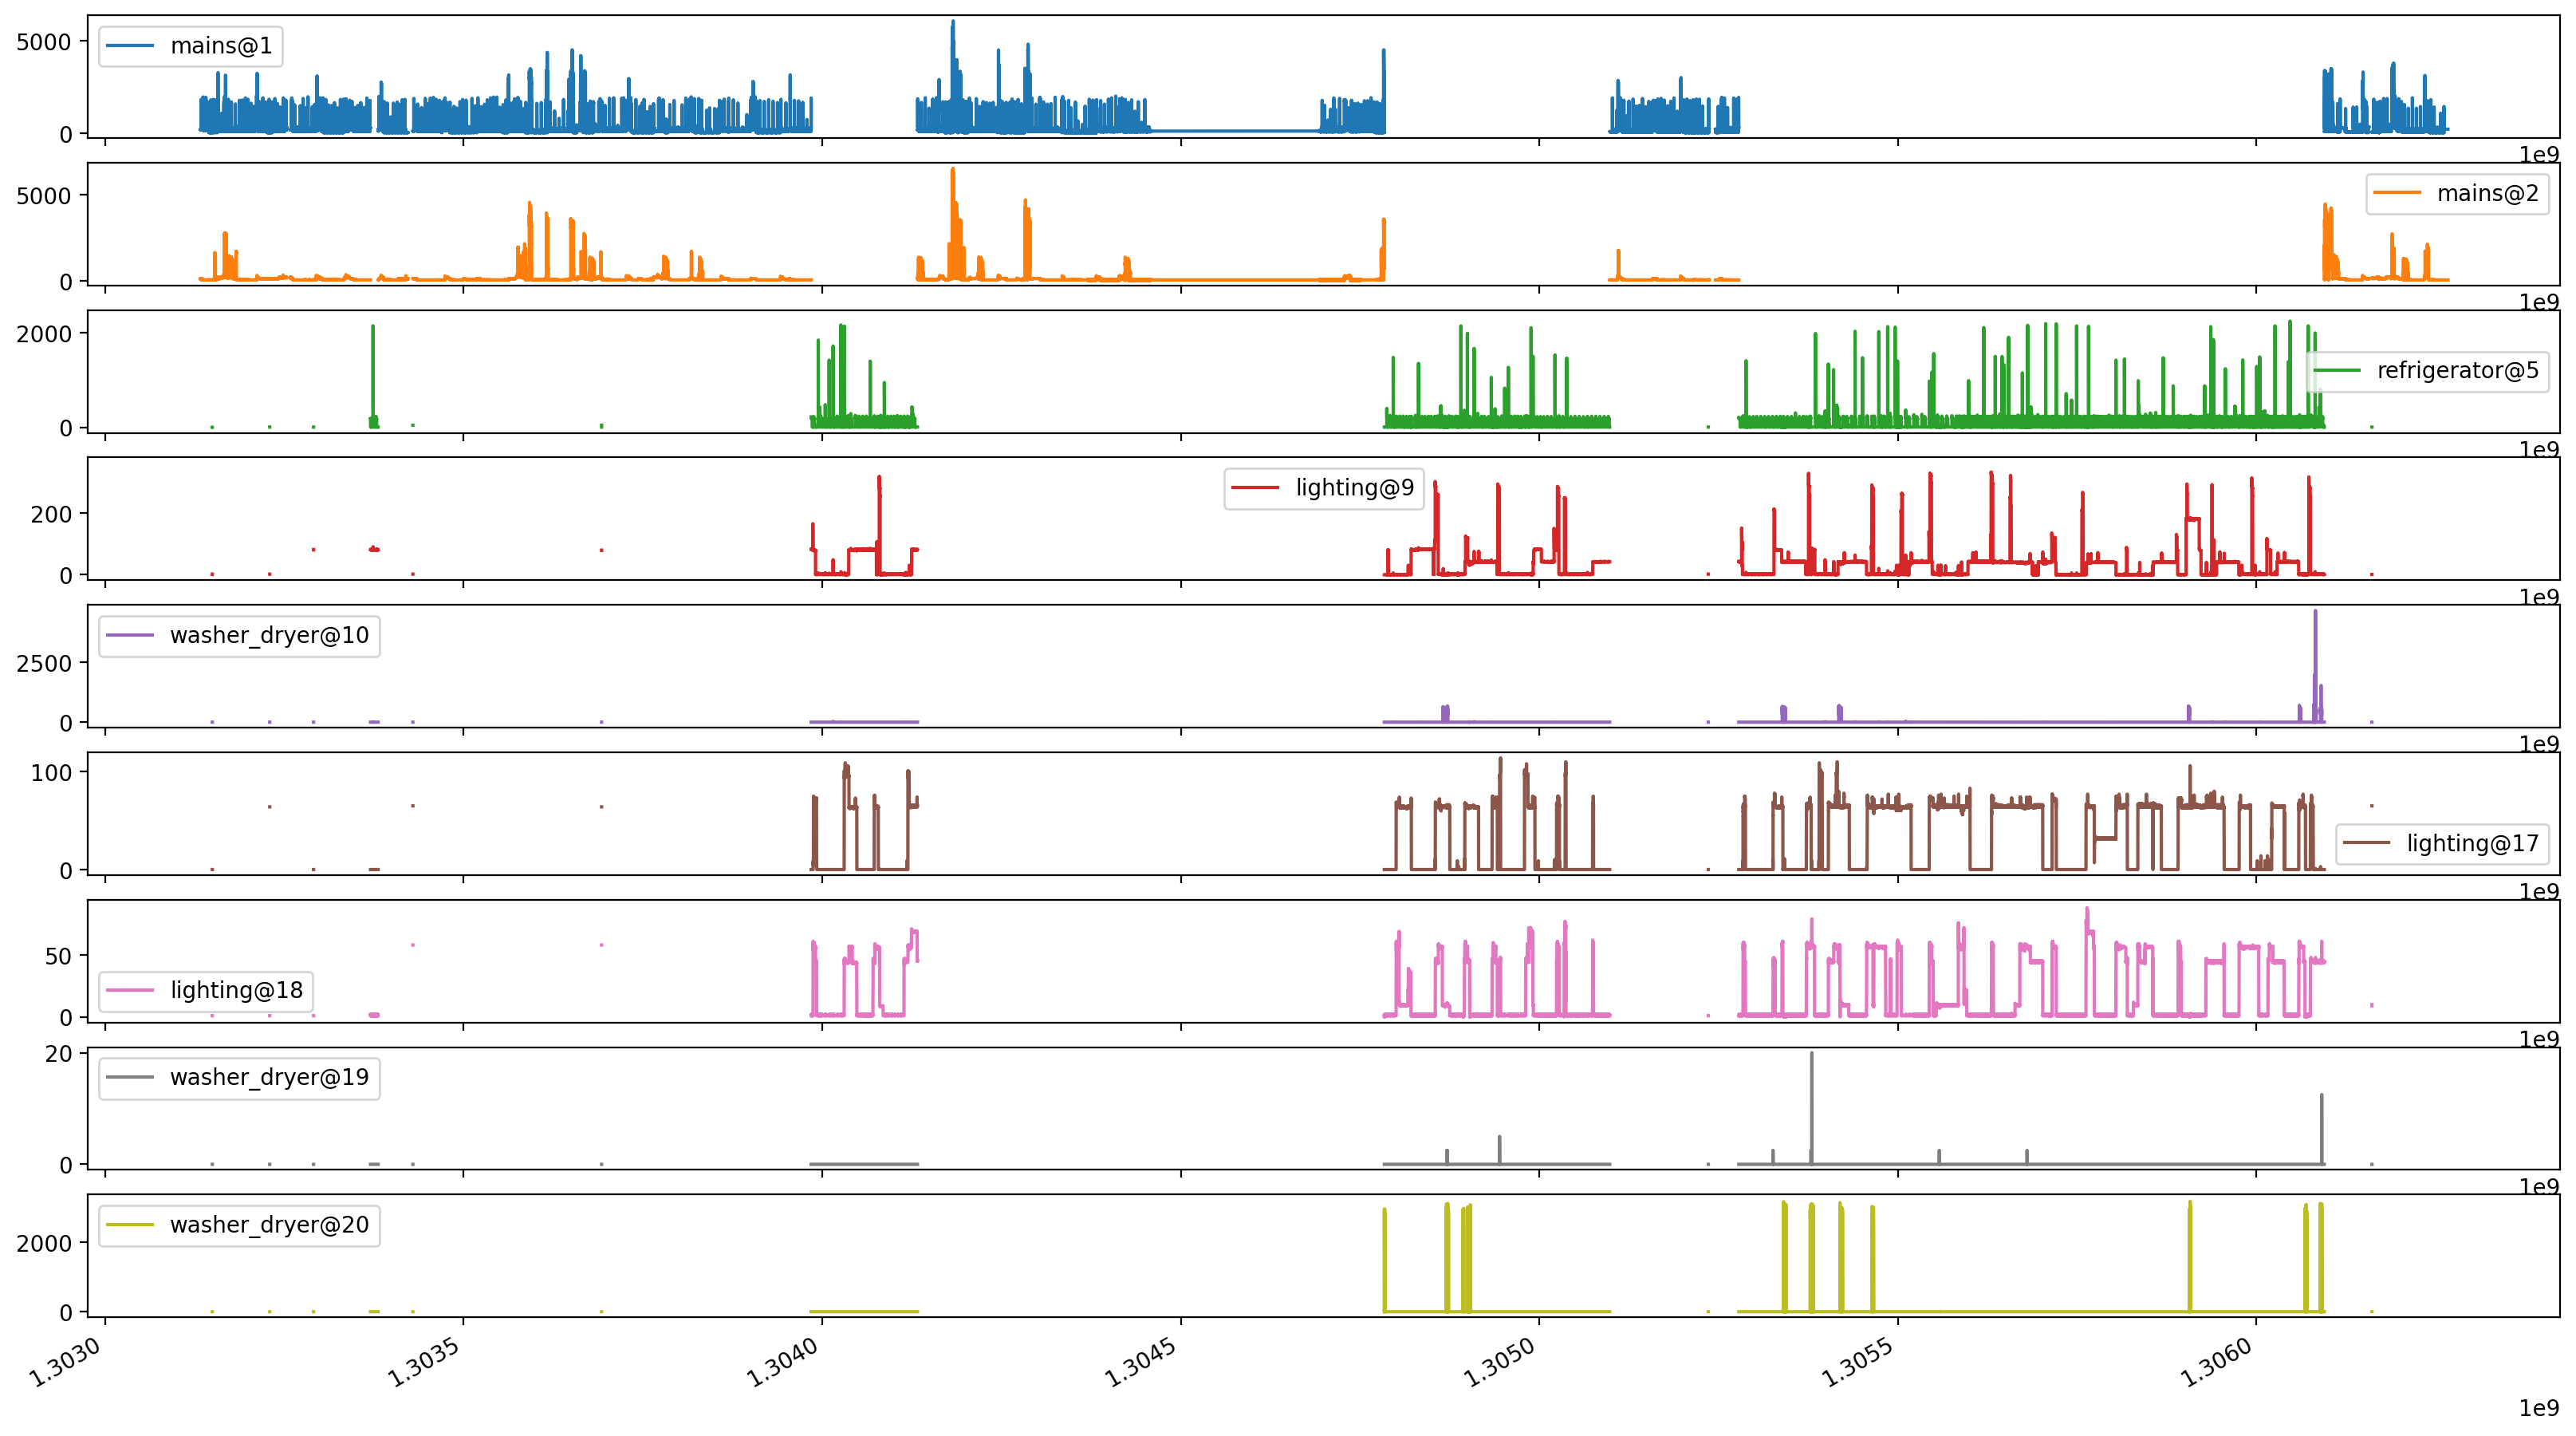

In [27]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['figure.dpi'] = 200
channels.plot(y = target_channels, subplots = True)